# LEGO Bricks ML Vision - Inference Pipeline Demonstration
We will use the lego_cli.py file to demonstrate the inference pipeline. The pipeline will consist of the following steps:

1. **Setup and Environment Configuration**: Ensure the necessary environment is set up, including cloning the repository and verifying CUDA availability.
2. **Image Selection**: Randomly select an image from the available test images.
3. **Inference Execution**: Run the full inference pipeline on the selected image, including brick detection, stud detection, and dimension classification.
4. **Result Visualization**: Display the results, including annotated images and detected dimensions.



## 1. Setup and Environment Configuration



In [2]:
# Check for "LEGO_BRICKS_ML_VISION" folder in the cwd folder branch

import os
import sys
from pathlib import Path
import subprocess
import logging
import rich.logging as rlog

# Set up rich logger with emoji support

logger = logging.getLogger("inference_demo")
if not logger.handlers:
    handler = rlog.RichHandler(markup=True)
    logger.setLevel(logging.INFO)
    logger.addHandler(handler)
    logger.info("🚀 Inference Demo Logger initialized")


def check_repo_clone():
    """
    Check if the cwd name matches the repo name.
    If not, check if the parent folder matches the repo name.
    If not, clone the repo.

    Returns the local repo root path and adds it to the sys.path
    """
    # Set up rich logger
    logger = logging.getLogger("repo_setup")
    handler = rlog.RichHandler(rich_tracebacks=True, markup=True)
    logger.setLevel(logging.INFO)
    if not logger.handlers:
        logger.addHandler(handler)
    
    userGithub = "MiguelDiLalla"
    repoGithub = "LEGO_Bricks_ML_Vision"
    repo_url = f"https://github.com/{userGithub}/{repoGithub}.git"

    cwd = Path.cwd()
    cwd_name = cwd.name
    cwd_parent = cwd.parent

    logger.info(f"Checking for repository: [bold blue]{repoGithub}[/bold blue]")
    
    if cwd_name != repoGithub and cwd_parent.name != repoGithub:
        logger.info(f"Repository not found in current path or parent directory")
        logger.info(f"Cloning from [green]{repo_url}[/green]...")
        
        try:
            subprocess.run(["git", "clone", repo_url], check=True)
            logger.info(f"Repository successfully cloned")
            # Add the repo to the sys.path
            sys.path.append(cwd / repoGithub)
            # Change the cwd to the repo root
            os.chdir(cwd / repoGithub)
            return cwd / repoGithub
        except subprocess.CalledProcessError as e:
            logger.error(f"Failed to clone repository: {e}")
            logger.error(f"Please clone manually with: git clone {repo_url}")
            raise RuntimeError(f"Repository setup failed: {e}")
    else:
        repo_path = cwd if cwd_name == repoGithub else cwd_parent
        logger.info(f"Repository [bold blue]{repoGithub}[/bold blue] already available at [bold green]{repo_path}[/bold green]")
        
        # Add the repo to the sys.path
        sys.path.append(repo_path)
        # Change the cwd to the repo root (and log it)
        logger.info(f"Changing working directory to: [bold green]{repo_path}[/bold green]")
        os.chdir(repo_path)
        return repo_path

repo_clone_path = check_repo_clone()


[03/09/25 16:44:46] INFO     🚀 Inference Demo Logger initialized                                     ]8;id=736708;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\2617228.py\2617228.py]8;;\:]8;id=102917;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\2617228.py#17\17]8;;\

[03/09/25 16:44:46] INFO     Checking for repository: LEGO_Bricks_ML_Vision                           ]8;id=47517;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\2617228.py\2617228.py]8;;\:]8;id=406320;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\2617228.py#43\43]8;;\

                    INFO     Repository LEGO_Bricks_ML_Vision already available at                    ]8;id=937602;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\2617228.py\2617228.py]8;;\:]8;id=233185;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\2617228.py#63\63]8;;\
                             c:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision                              

                    INFO     Changing working directory to:                                           ]8;id=17797;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\2617228.py\2617228.py]8;;\:]8;id=276701;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\2617228.py#68\68]8;;\
                             c:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision                              

In [3]:

# Verify CUDA availability
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
logger.info(f"Using device: {device}")


[03/09/25 16:44:50] INFO     Using device: cpu                                                      ]8;id=804814;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\4022083905.py\4022083905.py]8;;\:]8;id=788582;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\4022083905.py#4\4]8;;\

In [4]:
!python lego_cli.py --help

Usage: lego_cli.py [OPTIONS] COMMAND [ARGS]...

  LEGO Bricks ML Vision - Command Line Interface

  This tool provides commands for detecting LEGO bricks, classifying their
  dimensions, training models, and processing datasets.

  Inference Arguments:   For detection and inference commands (detect-bricks,
  detect-studs, infer):   --image    Path to input image or directory
  containing images (jpg/png)   --output   Directory to save results (created
  if not exists)   --conf     Confidence threshold for detections (0.0-1.0)

  Common Options:   --save-annotated   Save images with detection
  visualizations   --save-json       Save detection results in JSON format
  --clean-exif      Clean EXIF metadata before processing   --force-run
  Force re-run detection (ignore cached results)

Options:
  --debug / --no-debug  Enable debug output.
  --version             Show version information and exit.
  --help                Show this message and exit.

Commands:
  cleanup          Clean up 

2025-03-09 16:44:56,936 - INFO - 🚀 Config Utils module loaded.
2025-03-09 16:44:56,936 - INFO - 📌 REPO URL set to: https://api.github.com/repos/MiguelDiLalla/LEGO_Bricks_ML_Vision/contents/
2025-03-09 16:44:56,936 - INFO - 📂 Current working directory: c:\Users\User\Projects_Unprotected\LEGO_Bricks_ML_Vision
2025-03-09 16:44:56,936 - INFO - ✅ Found 8 images in presentation/Test_images/BricksPics
2025-03-09 16:44:56,937 - INFO - ✅ Found 20 images in presentation/Test_images/StudsPics
2025-03-09 16:44:56,986 - INFO - ✅ Bricks model loaded.
2025-03-09 16:44:57,036 - INFO - ✅ Studs model loaded.
2025-03-09 16:44:57,038 - INFO - 🖼️ Logo found locally.
2025-03-09 16:44:57,040 - INFO - 🚀 Detection Utils module loaded.
2025-03-09 16:44:57,041 - INFO - 🚀 Metadata Utils module loaded.
2025-03-09 16:44:57,054 - INFO - 🚀 EXIF Utils module loaded.
2025-03-09 16:44:57,055 - INFO - 🚀 Visualization Utils module loaded.
2025-03-09 16:44:57,057 - INFO - 🚀 Classification Utils module loaded.
2025-03-09 16


## 2. Run the inference pipeline:


[03/09/25 17:24:23] INFO     Processing image: image_668.jpg                                       ]8;id=658240;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\4010250058.py\4010250058.py]8;;\:]8;id=667288;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\4010250058.py#22\22]8;;\

[03/09/25 17:24:37] INFO     Processing image: image_277.jpg                                       ]8;id=523025;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\4010250058.py\4010250058.py]8;;\:]8;id=928050;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\4010250058.py#22\22]8;;\

[03/09/25 17:24:49] INFO     Processing image: image_14.jpg                                        ]8;id=220893;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\4010250058.py\4010250058.py]8;;\:]8;id=591423;file://C:\Users\User\AppData\Local\Temp\ipykernel_14236\4010250058.py#22\22]8;;\

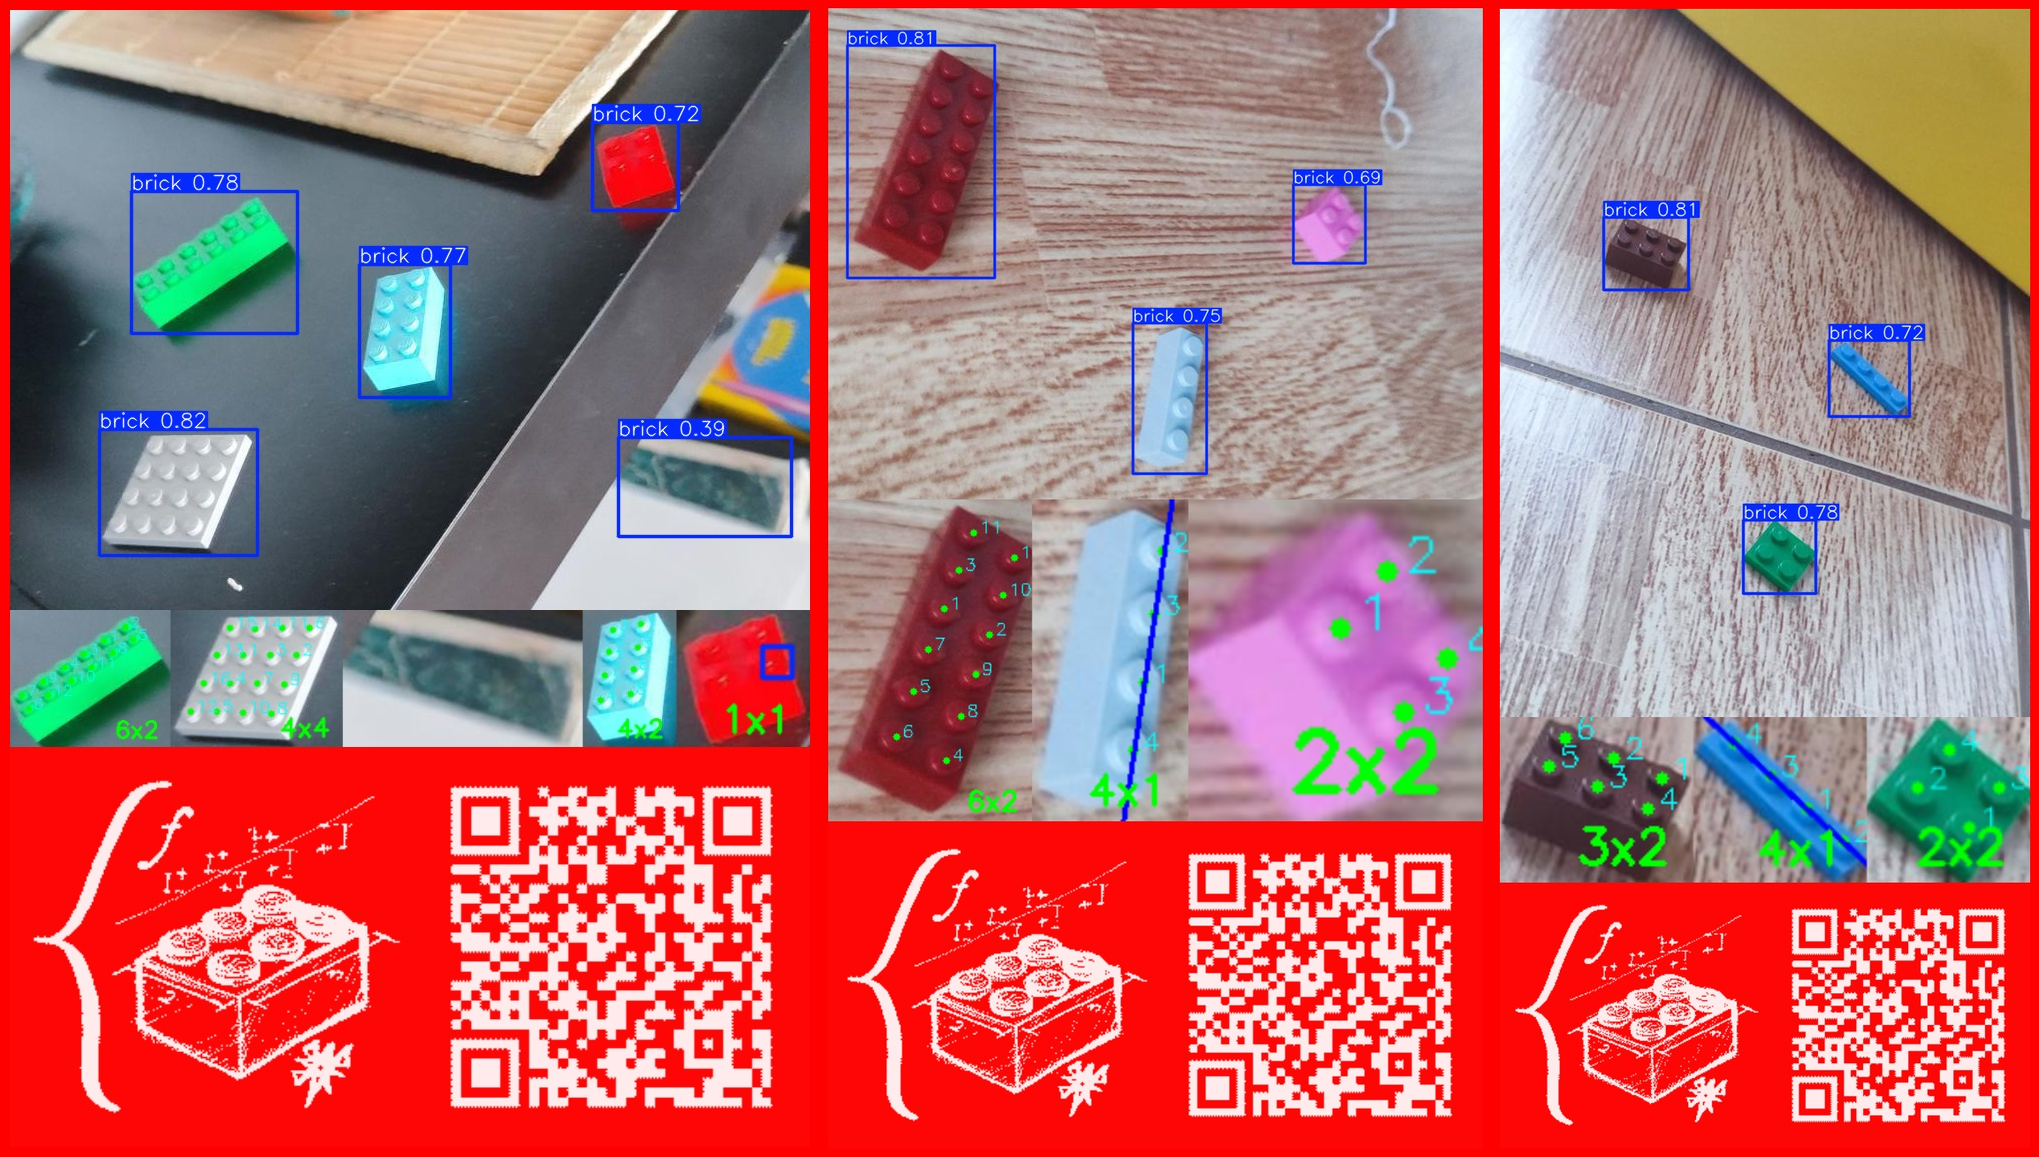

In [29]:
import random
from PIL import Image

def run_multiple_inferences(num_images=3, seed=None):
    """
    Run inference on multiple random images and display results side by side using PIL
    Images are normalized to the same height while preserving aspect ratios
    
    Args:
        num_images (int): Number of images to process (default=3)
        seed (int): Random seed for reproducibility (default=None)
    """
    if seed is not None:
        random.seed(seed)
    
    # Select random images
    selected_images = random.sample(bricks_images, min(num_images, len(bricks_images)))
    
    # Run inference on each image
    results = []
    for img_path in selected_images:
        logger.info(f"Processing image: {img_path.name}")
        
        subprocess.run(["python", "lego_cli.py", "infer", "--force-run",
                       "--image", str(img_path), 
                       "--output", str(output_directory)], 
                       check=True)
        
        result_path = output_directory / img_path.stem / 'full_analysis.jpg'
        results.append(Image.open(result_path))
    
    # Normalize height while preserving aspect ratio
    target_height = min(img.height for img in results)
    normalized_images = []
    total_width = 0
    
    for img in results:
        # Calculate new width to maintain aspect ratio
        aspect_ratio = img.width / img.height
        new_width = int(target_height * aspect_ratio)
        resized_img = img.resize((new_width, target_height), Image.Resampling.LANCZOS)
        normalized_images.append(resized_img)
        total_width += new_width
    
    # Create and populate the combined image
    combined_image = Image.new('RGB', (total_width, target_height))
    x_offset = 0
    for img in normalized_images:
        combined_image.paste(img, (x_offset, 0))
        x_offset += img.width
    
    display(combined_image)

# Example usage
run_multiple_inferences(num_images=3)


### Run inference Pipeline via cli using subprocess


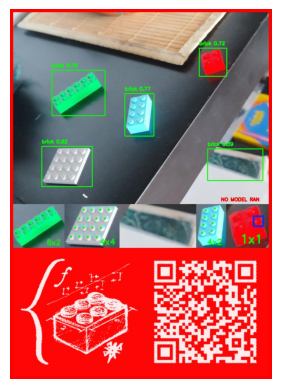

In [23]:
import subprocess

# Run inference pipeline
subprocess.run(["python", "lego_cli.py", "infer", "--image", str(bricks_image), "--output", str(output_directory)], check=True)

# Display the results
output_image = output_directory / bricks_image.stem / 'full_analysis.jpg'
result_image = Image.open(output_image)
plt.imshow(result_image)
plt.axis('off')
plt.show()
